In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp, odeint
from utils import get_data, ode_func, solve_ode
import torch
from PINN import PINN
from sklearn.preprocessing import MinMaxScaler

PATH = './data/'

def ode_func(y, t):
    X = y[0]
    S = y[1]
    mu = mu_max * S / (S + Km)
    dydt = [mu * X, -1 / Y_XS * mu * X]
    return dydt

In [3]:
mu_max = 0.84
Km = 0.013
Y_XS = 0.501

mu_max = 0.8348
Km = 0.1915
Y_XS = 0.4943

print(f"mu_max = {mu_max:.4f}")
print(f"Km = {Km:.4f}")
print(f"Y_XS = {Y_XS:.4f}")


mu_max = 0.8348
Km = 0.1915
Y_XS = 0.4943


In [4]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

for exp_id in ["BR01", "BR02", "BR03", "BR04", "BR05", "BR06", "BR07", "BR08", "BR09"]:
    print(f"Experiment {exp_id}")
    df = get_data(exp_id=exp_id, batch=True)
    
    t_start = df['Time'].values[0]
    t_end = df['Time'].values[-1]   
    y_0 = [df['Biomass'].values[0], df['Glucose'].values[0]]

    X_pred = []
    S_pred = []
    for i in range(len(df)):
        t0 = 0
        t1 = df['Time'].iloc[i]
        sol = odeint(ode_func, y_0, [t0, t1])
        pred = sol[-1]
        X_pred.append(pred[0])
        S_pred.append(pred[1])
    df['Biomass_pred'] = X_pred
    df['Glucose_pred'] = S_pred

    # Calculate RMSE and MAE for biomass and glucose
    rmse_biomass = mean_squared_error(df['Biomass'], df['Biomass_pred'], squared=False)
    mae_biomass = mean_absolute_error(df['Biomass'], df['Biomass_pred'])
    rmse_glucose = mean_squared_error(df['Glucose'], df['Glucose_pred'], squared=False)
    mae_glucose = mean_absolute_error(df['Glucose'], df['Glucose_pred'])
    print(f"...RMSE Biomass: {rmse_biomass:.4f}")
    print(f"...MAE Biomass: {mae_biomass:.4f}")
    print(f"...RMSE Glucose: {rmse_glucose:.4f}")
    print(f"...MAE Glucose: {mae_glucose:.4f}")
    print()
    
    # # Solve ODE
    # t_span = [t_start, t_end]
    # t_eval = df['Time'].values
    # sol = solve_ode(mu_max, Km, Y_XS, t_start, t_end, y_0, 1000)

    # # Plot solution
    # plt.figure(figsize=(10, 3))
    # plt.plot(sol.t, sol.y[0], label='Biomass (ODE)')
    # plt.plot(sol.t, sol.y[1], label='Glucose (ODE)')
    # plt.plot(df['Time'], df['Biomass'], 'o', label='Biomass (Data)')
    # plt.plot(df['Time'], df['Glucose'], 'o', label='Glucose (Data)')
    # plt.xlabel('Time (h)')
    # plt.ylabel('Concentration (g/L)')
    # plt.title(f'Experiment {exp_id}')



Experiment BR01
...RMSE Biomass: 0.1101
...MAE Biomass: 0.0690
...RMSE Glucose: 0.6191
...MAE Glucose: 0.4512

Experiment BR02
...RMSE Biomass: 0.6671
...MAE Biomass: 0.4813
...RMSE Glucose: 0.6762
...MAE Glucose: 0.4589

Experiment BR03
...RMSE Biomass: 0.3830
...MAE Biomass: 0.2664
...RMSE Glucose: 0.4927
...MAE Glucose: 0.4208

Experiment BR04
...RMSE Biomass: 0.2349
...MAE Biomass: 0.1555
...RMSE Glucose: 1.9508
...MAE Glucose: 1.7797

Experiment BR05
...RMSE Biomass: 0.9658
...MAE Biomass: 0.7006
...RMSE Glucose: 2.3259
...MAE Glucose: 1.8643

Experiment BR06
...RMSE Biomass: 0.1325
...MAE Biomass: 0.0793
...RMSE Glucose: 0.5540
...MAE Glucose: 0.4072

Experiment BR07
...RMSE Biomass: 0.0632
...MAE Biomass: 0.0406
...RMSE Glucose: 0.8390
...MAE Glucose: 0.7431

Experiment BR08
...RMSE Biomass: 0.9066
...MAE Biomass: 0.6940
...RMSE Glucose: 1.6219
...MAE Glucose: 1.1413

Experiment BR09
...RMSE Biomass: 0.0248
...MAE Biomass: 0.0157
...RMSE Glucose: 0.7101
...MAE Glucose: 0.5907



In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

for exp_id in ["BR01", "BR02", "BR03", "BR04", "BR05", "BR06", "BR07", "BR08", "BR09"]:
    print(f"Experiment {exp_id}")
    df = get_data(exp_id=exp_id, batch=True)
    
    t_start = df['Time'].values[0]
    t_end = df['Time'].values[-1]   
    y_0 = [df['Biomass'].values[0], df['Glucose'].values[0]]

    X_pred = []
    S_pred = []
    for i in range(len(df)):
        t0 = 0
        t1 = df['Time'].iloc[i]
        sol = odeint(ode_func, y_0, [t0, t1])
        pred = sol[-1]
        X_pred.append(pred[0])
        S_pred.append(pred[1])
    df['Biomass_pred'] = X_pred
    df['Glucose_pred'] = S_pred

    # Calculate RMSE and MAE for biomass and glucose
    rmse_biomass = mean_squared_error(df['Biomass'], df['Biomass_pred'], squared=False)
    mae_biomass = mean_absolute_error(df['Biomass'], df['Biomass_pred'])
    rmse_glucose = mean_squared_error(df['Glucose'], df['Glucose_pred'], squared=False)
    mae_glucose = mean_absolute_error(df['Glucose'], df['Glucose_pred'])
    print(f"...RMSE Biomass: {rmse_biomass:.4f}")
    print(f"...MAE Biomass: {mae_biomass:.4f}")
    print(f"...RMSE Glucose: {rmse_glucose:.4f}")
    print(f"...MAE Glucose: {mae_glucose:.4f}")
    print()
    break



Experiment BR01
...RMSE Biomass: 0.1101
...MAE Biomass: 0.0690
...RMSE Glucose: 0.6191
...MAE Glucose: 0.4512



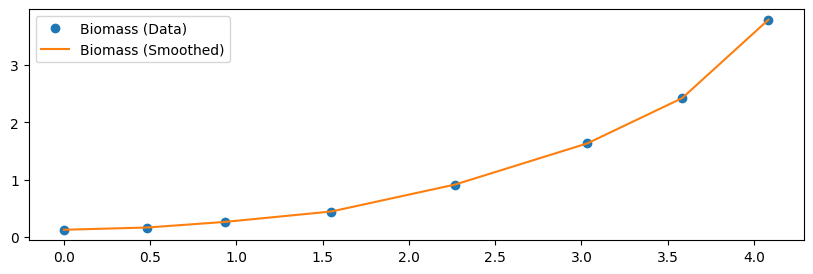

In [79]:
from scipy.signal import savgol_filter

t = df['Time'].values
biomass = df['Biomass'].values
biomass_smooth = savgol_filter(biomass, 5, 4, mode='interp')

plt.figure(figsize=(10, 3))
plt.plot(t, biomass, 'o', label='Biomass (Data)')
plt.plot(t, biomass_smooth, label='Biomass (Smoothed)')
plt.legend()
plt.show()